# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import cross_val_score, train_test_split

from sklearn.metrics import classification_report, confusion_matrix

# Importing Cleaned Data

In [2]:
data = pd.read_csv('./MIES_Dev_Data/cleaned_data.csv', index_col = 'Unnamed: 0')

In [3]:
data.head()

,Q1A,Q2A,Q3A,Q4A,Q5A,Q6A,Q7A,Q8A,Q9A,Q10A,...,Q85A,Q86A,Q87A,Q88A,Q89A,Q90A,Q91A,gender,age,IE
0,5,3,1,2,3,2,3,3,4,5,...,1,4,2,5,4,3,3,2,23,3
1,5,5,1,5,2,2,5,2,1,3,...,2,1,3,4,4,4,3,1,25,2
2,3,4,5,3,4,5,5,5,5,5,...,5,4,5,3,2,1,1,1,19,1
3,5,2,1,1,5,5,5,4,4,2,...,5,3,5,4,4,3,3,1,23,1
4,1,2,1,1,3,3,5,1,3,4,...,1,3,1,2,5,5,5,1,18,2


## Finding the best K value with CV

In [4]:
# Function to return mean score of cross validation based on the passed number of neighbor
def cross_val_mean_score(k):
    knn = KNeighborsClassifier(k)
    cvs = cross_val_score(knn, data.drop(['IE'], axis = 1), data['IE'], cv = 5)
    return cvs.mean()

In [5]:
# Will take some time!
# Let us try the number of neighbors from 1 to 20
accuracy = []
for k in range(1,21):
    accuracy.append(cross_val_mean_score(k))

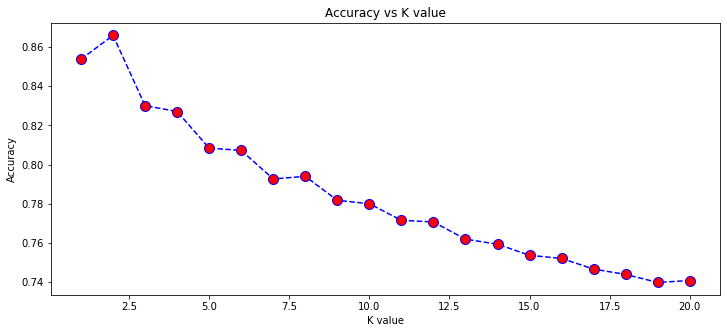

In [6]:
plt.figure(figsize = (12,5))
plt.plot(range(1,21), accuracy, color = 'blue', linestyle = 'dashed', marker = 'o', markerfacecolor = 'red', markersize = 10)
plt.title('Accuracy vs K value')
plt.xlabel('K value')
plt.ylabel('Accuracy')
plt.show()

In [7]:
cross_val_score(KNeighborsClassifier(2), data.drop(['IE'], axis = 1), data['IE'], cv = 5)

array([0.82159091, 0.81060606, 0.89314134, 0.89693066, 0.90791967])

### As we can see, the best choice for the K value is 2

## Random testing for metrics

In [8]:
X_train, X_test, Y_train, Y_test = train_test_split(data.drop(['IE'], axis = 1), data['IE'], test_size = 0.3)

In [9]:
knn = KNeighborsClassifier(2)
knn.fit(X_train, Y_train)

KNeighborsClassifier(n_neighbors=2)

In [10]:
predictions = knn.predict(X_test)

# Metric Analysis

In [11]:
print(classification_report(Y_test, predictions))

              precision    recall  f1-score   support

           1       0.90      0.69      0.78      1320
           2       0.87      0.99      0.93      1324
           3       0.78      0.85      0.81      1316

    accuracy                           0.84      3960
   macro avg       0.85      0.84      0.84      3960
weighted avg       0.85      0.84      0.84      3960



In [13]:
cm = pd.DataFrame(confusion_matrix(Y_test, predictions), index = ['True_Introvert', 'True_Extravert', 'True_Ambivert'], columns = ['Predicted_Introvert', 'Predicted_Extravert', 'Predicted_Ambivert'])
cm

,Predicted_Introvert,Predicted_Extravert,Predicted_Ambivert
True_Introvert,913,90,317
True_Extravert,6,1311,7
True_Ambivert,91,103,1122


### Most of the results are self-explanatory through the metrics, let us focus on blunders such as prediction results to an introvert for an extraverted data & vice versa

In [14]:
print("Probability of predicting as introvert for an extravert data : ", end = "")
print(cm['Predicted_Introvert']['True_Extravert'] / cm.loc['True_Extravert'].sum())

Probability of predicting as introvert for an extravert data : 0.004531722054380665


In [15]:
print("Probability of predicting as extravert for an introvert data : ", end = "")
print(cm['Predicted_Extravert']['True_Introvert'] / cm.loc['True_Introvert'].sum())

Probability of predicting as extravert for an introvert data : 0.06818181818181818


### As we can see, the prediction is imbalanced